In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,f1_score

data = pd.read_csv("../train.csv")
data.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct
1,189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct
2,189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct
3,189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,correct
4,189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,correct


In [53]:
data["label"].value_counts()

correct      15495
incorrect     1681
Name: label, dtype: int64

In [54]:
test = pd.read_csv("../test.csv")

test.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare
0,213284604,10.5,924,42,2.4486,148,2/1/2020 0:38,2/1/2020 0:53,6.83454,79.8750,6.77490,79.8840,289.27
1,213286352,10.5,4249,20,0.0000,91,2/1/2020 1:02,2/1/2020 2:13,6.91168,79.8723,6.55091,79.9706,1912.70
2,213293973,10.5,1552,255,2.6588,23,2/1/2020 5:02,2/1/2020 5:28,6.92145,79.8478,6.90539,79.8989,394.00
3,213294622,10.5,462,16,0.0000,198,2/1/2020 5:30,2/1/2020 5:38,6.77433,79.9416,6.80401,79.9407,154.32
4,213298687,10.5,814,392,12.3692,69,2/1/2020 7:00,2/1/2020 7:14,6.97968,79.9130,6.98875,79.8914,147.47


# EDA

In [55]:
test.isna().describe()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare
count,8576,8576,8576,8576,8576,8576,8576,8576,8576,8576,8576,8576,8576
unique,1,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,8576,8576,8576,8576,8576,8576,8576,8576,8576,8576,8576,8576,8576


In [56]:
data[data["label"]=="incorrect"].isna().describe()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
count,1681,1681,1681,1681,1681,1681,1681,1681,1681,1681,1681,1681,1681,1681
unique,1,2,2,2,2,2,1,1,1,1,1,1,2,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,1681,1532,1532,1532,1532,1532,1681,1681,1681,1681,1681,1681,1544,1681


In [57]:
data[data["label"]=="incorrect"].dropna().shape

(1526, 14)

# Feature Engineering

In [58]:
data["pickup_time"] = pd.to_datetime(data["pickup_time"])
data["drop_time"] = pd.to_datetime(data["drop_time"])
data["label"] = data["label"].apply(lambda x: 1 if x=="correct" else 0)

test["pickup_time"] = pd.to_datetime(test["pickup_time"])
test["drop_time"] = pd.to_datetime(test["drop_time"])
#test["label"] = test["label"].apply(lambda x: 1 if x=="correct" else 0)

In [59]:
data["pickup_time_minuts"] = data["pickup_time"].apply(lambda x: int(x.strftime("%M"))+int(x.strftime("%H"))*60)
#data["drop_time_minuts"] = data["drop_time"].apply(lambda x: int(x.strftime("%M"))+int(x.strftime("%H"))*60)
#data["pickup_day"] = data["pickup_time"].apply(lambda x: int(x.strftime("%w")))
#data["drop_day"] = data["drop_time"].apply(lambda x: int(x.strftime("%w")))
#data["pickup_month"] = data["pickup_time"].apply(lambda x: int(x.strftime("%m")))
#data["drop_month"] = data["drop_time"].apply(lambda x: int(x.strftime("%m")))

#data["pickup_time_minuts"]#.dt.strftime("%h%m%s").astype(int)

test["pickup_time_minuts"] = test["pickup_time"].apply(lambda x: int(x.strftime("%M"))+int(x.strftime("%H"))*60)
#test["drop_time_minuts"] = test["drop_time"].apply(lambda x: int(x.strftime("%M"))+int(x.strftime("%H"))*60)
#test["pickup_day"] = test["pickup_time"].apply(lambda x: int(x.strftime("%w")))
#test["drop_day"] = test["drop_time"].apply(lambda x: int(x.strftime("%w")))
#test["pickup_month"] = test["pickup_time"].apply(lambda x: int(x.strftime("%m")))
#test["drop_month"] = test["drop_time"].apply(lambda x: int(x.strftime("%m")))
#data["pickup_time_minuts"]#.dt.strftime("%h%m%s").astype(int)

In [60]:
data["date_diff"] = data['drop_time'] - data['pickup_time']
data['date_diff']=data['date_diff']/np.timedelta64(1,'s')

test["date_diff"] = test['drop_time'] - test['pickup_time']
test['date_diff']=test['date_diff']/np.timedelta64(1,'s')

In [61]:
data.corr()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,pickup_time_minuts,date_diff
tripid,1.000000,0.019145,-0.019747,-0.016882,-0.017301,-0.017864,0.027357,0.027085,0.005512,0.028426,-0.014595,0.062490,0.022025,-0.019198
additional_fare,0.019145,1.000000,-0.000772,0.197605,0.199604,0.002355,0.009124,0.000621,0.004644,0.001539,0.315285,-0.040910,-0.005085,-0.000812
duration,-0.019747,-0.000772,1.000000,0.969787,0.968666,0.040578,-0.027079,-0.025593,-0.015969,-0.013605,0.865256,-0.112955,-0.005873,0.999988
meter_waiting,-0.016882,0.197605,0.969787,1.000000,0.999474,0.030447,-0.016171,-0.014211,-0.010117,-0.007905,0.870126,-0.107266,-0.008998,0.969771
meter_waiting_fare,-0.017301,0.199604,0.968666,0.999474,1.000000,0.029908,-0.015014,-0.012483,-0.009430,-0.006805,0.865073,-0.103319,-0.008362,0.968650
meter_waiting_till_pickup,-0.017864,0.002355,0.040578,0.030447,0.029908,1.000000,0.011393,0.016509,0.006949,0.011065,0.045468,-0.035320,-0.006525,0.040657
pick_lat,0.027357,0.009124,-0.027079,-0.016171,-0.015014,0.011393,1.000000,0.522473,0.560466,0.340161,-0.024556,-0.029237,0.016329,-0.026462
pick_lon,0.027085,0.000621,-0.025593,-0.014211,-0.012483,0.016509,0.522473,1.000000,0.307313,0.654917,-0.035237,-0.037713,0.033701,-0.024942
drop_lat,0.005512,0.004644,-0.015969,-0.010117,-0.009430,0.006949,0.560466,0.307313,1.000000,-0.414566,-0.015530,-0.012781,0.003055,-0.015487
drop_lon,0.028426,0.001539,-0.013605,-0.007905,-0.006805,0.011065,0.340161,0.654917,-0.414566,1.000000,-0.014912,-0.030347,0.040187,-0.013263


# Null Value handling

When we consider about the correlation values of features, features like fare, duration, meter_waiting, meter_waiting_fare, meter_waiting_till_pickup are give a correlation value near to 1 with date_diff. So, we can use a linear model to fill the null values in those columns 

In [62]:
#data = data.dropna()
new_data = data[["date_diff" , "fare"]]

n_train = new_data[new_data["fare"].notna()]

fil_mod = LinearRegression()

fil_mod.fit(n_train[["date_diff"]] , n_train["fare"])

p = np.array(new_data[new_data["fare"].isna()]["date_diff"]).reshape(-1,1)

predicted = fil_mod.predict(p)

data.loc[data["fare"].isna(),"fare"] =  predicted

In [63]:
new_data = data[["date_diff" , "duration"]]

n_train = new_data[new_data["duration"].notna()]

fil_mod = LinearRegression()

fil_mod.fit(n_train[["date_diff"]] , n_train["duration"])

p = np.array(new_data[new_data["duration"].isna()]["date_diff"]).reshape(-1,1)

predicted = fil_mod.predict(p)

data.loc[data["duration"].isna(),"duration"] =  predicted

In [64]:
new_data = data[["date_diff" , "meter_waiting"]]

n_train = new_data[new_data["meter_waiting"].notna()]

fil_mod = LinearRegression()

fil_mod.fit(n_train[["date_diff"]] , n_train["meter_waiting"])

p = np.array(new_data[new_data["meter_waiting"].isna()]["date_diff"]).reshape(-1,1)

predicted = fil_mod.predict(p)

data.loc[data["meter_waiting"].isna(),"meter_waiting"] =  predicted

In [65]:
new_data = data[["date_diff" , "meter_waiting_fare"]]

n_train = new_data[new_data["meter_waiting_fare"].notna()]

fil_mod = LinearRegression()

fil_mod.fit(n_train[["date_diff"]] , n_train["meter_waiting_fare"])

p = np.array(new_data[new_data["meter_waiting_fare"].isna()]["date_diff"]).reshape(-1,1)

predicted = fil_mod.predict(p)

data.loc[data["meter_waiting_fare"].isna(),"meter_waiting_fare"] =  predicted

In [66]:
new_data = data[["date_diff" , "meter_waiting_till_pickup"]]

n_train = new_data[new_data["meter_waiting_till_pickup"].notna()]

fil_mod = LinearRegression()

fil_mod.fit(n_train[["date_diff"]] , n_train["meter_waiting_till_pickup"])

p = np.array(new_data[new_data["meter_waiting_till_pickup"].isna()]["date_diff"]).reshape(-1,1)

predicted = fil_mod.predict(p)

data.loc[data["meter_waiting_till_pickup"].isna(),"meter_waiting_till_pickup"] =  predicted

In [67]:
data.shape

(17176, 16)

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17176 entries, 0 to 17175
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   tripid                     17176 non-null  int64         
 1   additional_fare            16974 non-null  float64       
 2   duration                   17176 non-null  float64       
 3   meter_waiting              17176 non-null  float64       
 4   meter_waiting_fare         17176 non-null  float64       
 5   meter_waiting_till_pickup  17176 non-null  float64       
 6   pickup_time                17176 non-null  datetime64[ns]
 7   drop_time                  17176 non-null  datetime64[ns]
 8   pick_lat                   17176 non-null  float64       
 9   pick_lon                   17176 non-null  float64       
 10  drop_lat                   17176 non-null  float64       
 11  drop_lon                   17176 non-null  float64       
 12  fare

In [69]:
data.drop(["tripid" , "pickup_time" , "drop_time" ], axis=1, inplace=True)

test.drop(["tripid" , "pickup_time" , "drop_time" ], axis=1, inplace=True)

In [70]:
data["additional_fare"].fillna(0 , inplace=True)

In [71]:
data

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,pickup_time_minuts,date_diff
0,10.5,834.000000,56.000000,0.0000,64.000000,6.86252,79.8993,6.90330,79.8783,270.32,1,20,840.0
1,10.5,791.000000,47.000000,0.0000,134.000000,6.88589,79.8984,6.91373,79.8923,197.85,1,56,780.0
2,10.5,1087.000000,80.000000,0.0000,61.000000,6.90839,79.8651,6.93669,79.9146,301.64,1,68,1080.0
3,10.5,598.000000,271.000000,15.6638,68.000000,6.92570,79.8895,6.92748,79.8971,82.30,1,147,600.0
4,0.0,1019.689378,-28.808214,-5.8773,110.954739,6.87441,79.8615,6.84478,79.9290,358.39,1,214,1020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17171,10.5,838.000000,93.000000,5.4219,451.000000,7.29073,80.6367,7.28891,80.6557,198.26,1,1327,840.0
17172,10.5,2151.000000,428.000000,0.0000,39.000000,6.90569,79.8516,6.95089,79.9389,581.23,1,1387,2160.0
17173,10.5,263.000000,9.000000,0.0000,110.000000,7.09210,79.9000,7.10135,79.9017,76.20,1,1401,240.0
17174,10.5,858.000000,115.000000,0.0000,317.000000,6.94540,79.8768,6.93574,79.9010,133.31,1,1419,840.0


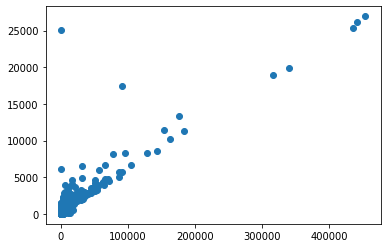

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(data["date_diff"] , data["fare"])

# Splitting the dataset

In [73]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.utils import resample
from sklearn.utils import shuffle

# separate minority and majority classes
#data = data[["additional_fare","duration","meter_waiting","meter_waiting_fare","meter_waiting_till_pickup","pick_lat","pick_lon","drop_lat","drop_lon","fare","date_diff","label"]]
scale = StandardScaler()

#data.iloc[:,:-1] = scale.fit_transform(data.drop(["label"],axis=1))

#train, test = train_test_split(data, test_size=0.2, random_state=42)

#print (data.head())

#incorrect = train[train.label==0]
#correct = train[train.label==1]

# upsample minority
#incorrect_upsampled = resample(incorrect,
#                          replace=True, # sample with replacement
#                          n_samples=len(correct), # match number in majority class
 #                         random_state=27) # reproducible results

# combine majority and upsampled minority
#upsampled = pd.concat([correct, incorrect_upsampled])
#upsampled = shuffle(upsampled)
# check new class counts
#upsampled.label.value_counts()

X = data.drop(["label"],axis=1)
Y = data["label"]
#y_train = train["label"]
X = scale.fit_transform(X)
#X_test = test.drop(["label"],axis=1)
#y_test = test["label"]
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)    


print (y_train.value_counts())
print(y_test.value_counts())


1    12371
0     1369
Name: label, dtype: int64
1    3124
0     312
Name: label, dtype: int64


In [74]:
X.shape
test.shape

(8576, 12)

# Fitting model

In [ ]:
import xgboost

clf = xgboost.XGBClassifier(n_estimators = 1000)

clf.fit(X_train,y_train)

pred = clf.predict(X_test)

from sklearn.metrics import f1_score,confusion_matrix

print (confusion_matrix(y_test,pred))

print (f1_score(y_test,pred))

pred_1 = clf.predict(X_train)

print (confusion_matrix(y_train,pred_1))

print (f1_score(y_train,pred_1))


In [75]:
from sklearn.ensemble import RandomForestClassifier

#del(rf_clf)
rf_clf = RandomForestClassifier(n_estimators=1000)

rf_clf.fit(X_train,y_train)

pred = rf_clf.predict(X_test)

print (confusion_matrix(y_test,pred))

print (f1_score(y_test,pred))

pred_1 = rf_clf.predict(X_train)

print (confusion_matrix(y_train,pred_1))

print (f1_score(y_train,pred_1))

[[ 168  144]
 [  34 3090]]
0.9720037747719408
[[ 1369     0]
 [    0 12371]]
1.0


In [76]:
t_pred = rf_clf.predict(scale.transform(test))

test_sub = pd.read_csv("../sample_submission.csv")

test_sub["prediction"] = t_pred

test_sub.to_csv("../late_sub7.csv" , index=False)

In [ ]:
scale.transform(test)

In [ ]:
from sklearn.model_selection import cross_validate


rf1_clf = RandomForestClassifier(n_estimators=1000)

cv = cross_validate(rf1_clf, X,Y,cv=4, scoring= {'f1' , 'accuracy' , 'recall' , 'precision'})

print (cv['train_accuracy'])
print (cv['train_accuracy'].mean())

print (cv['train_recall'])
print (cv['train_recall'].mean())

print (cv['train_precision'])
print (cv['train_precision'].mean())

print (cv['train_f1'])
print (cv['train_f1'].mean())

print (cv['test_f1'])
print (cv['test_f1'].mean())

print (cv['test_accuracy'])
print (cv['test_accuracy'].mean())

print (cv['test_recall'])
print (cv['test_recall'].mean())

print (cv['test_precision'])
print (cv['test_precision'].mean())



In [ ]:
pred_cv = rf_clf.predict(X)

data["pred"] = pred_cv

data1 = data[data["pred"]!= data["label"] ]

data1


In [ ]:
data1["label"].value_counts()

In [ ]:
data1.describe()

In [ ]:
#del(rf_clf)

#rf_clf = RandomForestClassifier(n_estimators=1000)

#rf_clf.fit(X,Y)

pred = cv.predict(X_test)


print (confusion_matrix(y_test,pred))

print (f1_score(y_test,pred))

pred_1 = cv.predict(X_train)

print (confusion_matrix(y_train,pred_1))

print (f1_score(y_train,pred_1))

In [ ]:
cv.keys()

In [ ]:
t_pred = rf_clf.predict(scale.transform(test))

test_sub = pd.read_csv("../sample_submission.csv")

test_sub["prediction"] = t_pred

test_sub.to_csv("../rf0528_lrfn_with_add_fare_MaxMinScaler.csv" , index=False)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()

lr_clf.fit(X_train,y_train)

pred = lr_clf.predict(X_test)

print (confusion_matrix(y_test,pred))

print (f1_score(y_test,pred))

pred_1 = lr_clf.predict(X_train)

print (confusion_matrix(y_train,pred_1))

print (f1_score(y_train,pred_1))

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb_clf = GaussianNB()

gnb_clf.fit(X_train,y_train)

pred = gnb_clf.predict(X_test)

print (confusion_matrix(y_test,pred))

print (f1_score(y_test,pred))

pred = gnb_clf.predict(X_train)

print (confusion_matrix(y_train,pred))

print (f1_score(y_train,pred))


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators=1000)

gb_clf.fit(X,Y)

pred = gb_clf.predict(X_test)


print (confusion_matrix(y_test,pred))

print (f1_score(y_test,pred))

pred_1 = gb_clf.predict(X_train)

print (confusion_matrix(y_train,pred_1))

print (f1_score(y_train,pred_1))

In [ ]:
t_pred = gb_clf.predict(scale.transform(test))

test_sub = pd.read_csv("../sample_submission.csv")

test_sub["prediction"] = t_pred

test_sub.to_csv("../gb_clf_1206_with_upsample.csv" , index=False)

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(activation='relu', solver='sgd' , verbose=True , early_stopping=False , tol= 10**-20)

mlp_clf.fit(X_train,y_train)

pred = mlp_clf.predict(X_test)


print (confusion_matrix(y_test,pred))

print (f1_score(y_test,pred))

pred_1 = mlp_clf.predict(X_train)

print (confusion_matrix(y_train,pred_1))

print (f1_score(y_train,pred_1))

In [ ]:
from sklearn.model_selection import cross_validate
help(cross_validate)